## 1. Convert the training dataset masks from polygon points

In [18]:
import os
import cv2
import numpy as np

# Directory paths
img_path = "/Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/U-Net/train_roboflow/images"
gt_path = "/Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/U-Net/train_roboflow/labels"
output_path = "/Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/U-Net/train/masks"

# Ensure output directory exists
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Iterate over files in the image directory
for img_file in os.listdir(img_path):
    if img_file.endswith(".jpg") or img_file.endswith(".png"):  # adjust based on your image format
        # Read the image
        img = cv2.imread(os.path.join(img_path, img_file))

        # Create a blank black image with the same dimensions as the original image
        mask = np.zeros_like(img, dtype=np.uint8)

        # Read the corresponding ground truth file
        gt_file = os.path.splitext(img_file)[0] + ".txt"  # assuming ground truth files have the same name as images
        gt_file_path = os.path.join(gt_path, gt_file)

        if os.path.exists(gt_file_path):
            class_0_points = []
            class_1_points = []
            with open(gt_file_path, "r") as file:
                lines = file.readlines()
                for line in lines:
                    data = line.split()
                    class_label = int(data[0])
                    points = [(float(data[i]), float(data[i+1])) for i in range(1, len(data), 2)]
                    # Convert normalized coordinates to pixel coordinates
                    img_height, img_width, _ = img.shape
                    points = [(int(point[0] * img_width), int(point[1] * img_height)) for point in points]
                    if class_label == 0:
                        class_0_points.extend(points)
                    elif class_label == 1:
                        class_1_points.extend(points)

            # Create numpy arrays of points for drawing the polygons
            polygon_points_0 = np.array(class_0_points)
            polygon_points_1 = np.array(class_1_points)

            # Draw the filled polygons on the mask
            if len(polygon_points_0) > 0:
                cv2.fillPoly(mask, [polygon_points_0], color=(128, 128, 128))  # Assigning gray for class 0
            if len(polygon_points_1) > 0:
                cv2.fillPoly(mask, [polygon_points_1], color=(255, 255, 255))  # Assigning white for class 1

            # Resize the output image to 101x200
            # mask_resized = cv2.resize(mask, (101, 200))

            # Save the output image as JPEG
            output_file = os.path.splitext(img_file)[0] + ".png"
            output_file_path = os.path.join(output_path, output_file)
            cv2.imwrite(output_file_path, mask)

            print(f"Saved resized output image for {img_file} as {output_file_path}")
        else:
            print(f"No ground truth file found for {img_file}")


Saved resized output image for 244_img_png.rf.7574c55db4457b53602f23533a76a816.jpg as /Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/U-Net/train/masks/244_img_png.rf.7574c55db4457b53602f23533a76a816.png
Saved resized output image for 325_img_png.rf.067bd247fe5d199865d70062abed348b.jpg as /Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/U-Net/train/masks/325_img_png.rf.067bd247fe5d199865d70062abed348b.png
Saved resized output image for 36_img_png.rf.e0b74b91aec07ab26ab84524aee64eaf.jpg as /Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/U-Net/train/masks/36_img_png.rf.e0b74b91aec07ab26ab84524aee64eaf.png
Saved resized output image for 45_img_png.rf.c48180996cde5daf7f642e0b8a5bd2d0.jpg as /Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/U-Net/train/masks/45_img_png.rf.c48180996cde5daf7f642e0b8a5bd2d0.

Resize the original images to 101,200

In [2]:
import cv2
import os

# Path to the folder containing the original images
original_images_folder = "/Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/datasets/MCAB-3-1/train/images"

# Path to the folder where resized images will be saved
resized_images_folder = "/Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/U-Net/train/images"

# Ensure the output folder exists, create it if it doesn't
if not os.path.exists(resized_images_folder):
    os.makedirs(resized_images_folder)

# Loop through each file in the original images folder
for filename in os.listdir(original_images_folder):
    if filename.endswith((".jpg", ".png", ".jpeg")):  # Adjust the file extensions as needed
        # Open the original image using OpenCV
        original_image_path = os.path.join(original_images_folder, filename)
        original_image = cv2.imread(original_image_path)

        # Resize the image to the desired dimensions (200x101)
        resized_image = cv2.resize(original_image, (101, 200))

        # Save the resized image to the output folder
        resized_image_path = os.path.join(resized_images_folder, filename)
        cv2.imwrite(resized_image_path, resized_image)

        print(f"Resized image saved: {resized_image_path}")


Resized image saved: /Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/U-Net/train/images/259_img_png.rf.e9e0587503a952794e3e0d3a749035a0.jpg
Resized image saved: /Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/U-Net/train/images/57_img_png.rf.c2e6482cfda7a8aac0818c10abe96c01.jpg
Resized image saved: /Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/U-Net/train/images/3_img_png.rf.86c077a0fb6d191e5dc359eeaff17904.jpg
Resized image saved: /Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/U-Net/train/images/262_img_png.rf.c0c61df310de03156e69efaaf39e3489.jpg
Resized image saved: /Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/U-Net/train/images/253_img_png.rf.3a7fc784362a94f77199b3dbb2ae0fbd.jpg
Resized image saved: /Users/mohammadfaridnaufal/Library/CloudSt

Show the ground truth

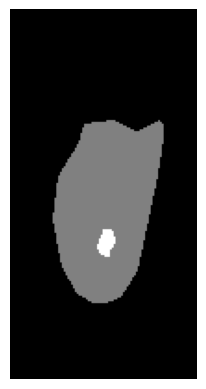

In [21]:
import matplotlib.pyplot as plt
import cv2

# Read the image
image_path = "/Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/U-Net/train/masks/3_img_png.rf.133daa46d2ec27a8a40938aa2b4fe578.png"
image = cv2.imread(image_path)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis
plt.show()


In [23]:
image_gray = image_rgb[:,:,1]

In [24]:
import numpy as np
unique_values, counts = np.unique(image_gray, return_counts=True)

# Print the counts for each unique value
for value, count in zip(unique_values, counts):
    print(f"Value {value}: Count {count}")

Value 0: Count 15849
Value 128: Count 4246
Value 255: Count 105


In [25]:
import tensorflow_datasets as tfds
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

ModuleNotFoundError: No module named 'tensorflow_datasets'